In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
data = pd.read_csv('vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# 1.  Data understanding

In [94]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [95]:
data.shape

(426880, 26)

In [96]:
data['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [97]:
data['VIN'].value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118264, dtype: int64

In [98]:
for column in ['lat','long']:
    print(data[column].value_counts())

33.779214    3301
43.182400    2666
40.468785    2346
33.786500    2341
46.234838    1866
             ... 
29.016844       1
35.143705       1
35.249000       1
35.123981       1
43.642930       1
Name: lat, Length: 53181, dtype: int64
-84.411811     3301
-84.112200     2666
-74.281707     2346
-84.445400     2341
-119.128015    1866
               ... 
-85.686734        1
-85.656238        1
-85.570107        1
-85.696535        1
-108.222976       1
Name: long, Length: 53772, dtype: int64


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [100]:
data.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Print out all of the columns `value_counts()`. Then we analyise by hand what features to use in our model and what not to use.

In [101]:
for column in data.columns:
    print(data[column].value_counts())

7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: id, Length: 426880, dtype: int64
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html                     1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html                      1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html              1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html             1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html                   1
                                                                                                   ..
https://chicago.craigslist.org/chc/cto/d/pleasant-prairie-2015-f80-m3-700hp-many/7314655506.html    1
https://chicago.craigslist.org/wcl/cto/d/saint-charles-2013-ford-focus-

2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400    11
2021-04-16T12:07:56-0500    10
2021-04-29T20:06:09-0500     9
                            ..
2021-04-05T12:01:13-0500     1
2021-04-05T13:57:52-0500     1
2021-04-05T14:28:08-0500     1
2021-04-05T14:33:37-0500     1
2021-04-04T03:21:07-0600     1
Name: posting_date, Length: 381536, dtype: int64


# 2.  Data preparation

In [102]:
columns = ['price', 'year', 'manufacturer', 'condition',
'cylinders', 'odometer', 'fuel',
'transmission', 'drive', 'type', 'paint_color',
'size','model']

In [103]:
data = data[columns]
data = data.dropna()
data.shape

(79195, 13)

In [104]:
data_test = data.copy()

In [105]:
data['model'].value_counts()

f-150                   1637
silverado 1500          1434
1500                     882
camry                    683
accord                   659
                        ... 
cla250 coupe               1
cadenza limited-sxl        1
jetta tdi sportwagen       1
s3 2.0t quattro            1
gand wagoneer              1
Name: model, Length: 9530, dtype: int64

# String metric

In [106]:
old_models = data.groupby(['manufacturer'])
old_models = old_models.get_group('volkswagen')
old_models = old_models['model'].unique()
len(old_models)

275

In [107]:
old_models

array(['jetta', 'jetta gli fahrenheit', 'passat', 'passat wolfsburg',
       'passat se', 'beetle convertible', 'jetta gli',
       'passat tsi wolfsburg', 'eurovan camper', 'jetta s',
       'super beetle', 'golf', 'jetta 1.4t s', 'gti', 'eurovan gls',
       'jetta sport', 'golf alltrack awd', 'jetta 2.5', 'beetle',
       'passat tdi', 'jetta 2.0 tdi', 'van/bus', 'cc', 'passat 1.8 l',
       'jetta sel', 'cabriolet', 'beetle turbo', 'convertible',
       'karmann ghia', 'jetta sportwagen tdi', 'jetta tdi',
       'beetle sedan', 'vanagon', 'golf gti turbo se', 'jetta sedan',
       'dune buggy', 'eos komfort', 'passat 1.8t se',
       'cabrio convertible', 'touareg awd', 'jetta gls', 'cabrio',
       'rabbit', 'passat tdi se', 'passat 2.0t', 'touareg', 'tiguan',
       'jetta 1.9 tdi mk4', 'golf gti', 'tiguan 2.0', 'golf gti autobahn',
       'cc sport', 'vanagon westfalia', 'gti autobahn', 'jetta se',
       'cc vr6 sport', 'passat gl wagon', 'karmann', 'gti se',
       'tiguan 4 m

In [108]:
!pip install jaro-winkler

In [109]:
import jaro

In [110]:
from itertools import combinations

In [111]:
from difflib import get_close_matches

In [112]:
test_group = data_test.groupby(['manufacturer'])
volkswagen = test_group.get_group('volkswagen')
volkswagen = volkswagen['model'].unique()
volkswagen.sort()
volkswagen = combinations(volkswagen, 2)
#jaroList = []
#jaroModel = []
for i in volkswagen:
    #jaroList.append(jaro.jaro_metric(i[0],i[1]))
    #jaroModel.append(i)
    if jaro.jaro_metric(i[0],i[1]) >= 0.9:
        data_test['model'] = data_test['model'].replace([i[1]], i[0])
        #test_group = data_test.groupby(['manufacturer'])
        #volkswagen = test_group.get_group('volkswagen')
        #volkswagen = volkswagen['model'].unique()
        #volkswagen.sort()
        #volkswagen = combinations(volkswagen, 2)
testUnique = data_test.groupby(['manufacturer'])
testUnique = testUnique.get_group('volkswagen')
testUnique = testUnique['model'].unique()
len(testUnique)
#print(jaroList)
#print(jaroModel)

200

In [113]:
testUnique

array(['jetta', 'jetta gli fahrenheit', 'passat', 'passat 1.8t wolfsburg',
       'passat s', 'beetle convertible', 'jetta gl',
       'passat tsi wolfsburg', 'eurovan camper', 'super beetle', 'egolf',
       'jetta 1.4t s', 'gti', 'eurovan gls', 'jetta sport',
       'golf alltrack', 'jetta 2.5', 'beetle', 'passat se tdi',
       'jetta 2.0 tdi', 'van/bus', 'cc', 'passat 1.8 l', 'jetta s',
       'cabriolet', 'beetle turbo', 'bug convertible', 'karmann ghia',
       'jetta sport wagon tdi', 'jetta tdi', 'beetle sedan', 'vanagon',
       'golf gti turbo se', 'jetta se', 'dune buggy', 'eos komfort',
       'cabrio convertable', 'touareg awd', 'cabrio', 'rabbit',
       'passat 2.0t', 'touareg', 'tiguan', 'jetta 1.9 tdi mk4',
       'golf gti', 'tiguan 2.0', 'golf gti autobahn', 'cc sport',
       'vanagon westfalia', 'gti autobahn', 'cc vr6 sport',
       'passat gl wagon', 'karmann', 'gti se', 'tiguan 4 motion',
       'fiberjet beachcomber', 'jetta sedan 2.0l', 'r32', 'e-golf',
      

In [114]:
data_test['model'].value_counts()

f-150                  1637
silverado 1500         1434
1500                    882
camry                   683
accord                  659
                       ... 
cadenza limited-sxl       1
camaro lt-2               1
a4 3.0 quattro            1
cla250 coupe              1
gand wagoneer             1
Name: model, Length: 9455, dtype: int64

In [115]:
data['model'].value_counts()

f-150                   1637
silverado 1500          1434
1500                     882
camry                    683
accord                   659
                        ... 
cla250 coupe               1
cadenza limited-sxl        1
jetta tdi sportwagen       1
s3 2.0t quattro            1
gand wagoneer              1
Name: model, Length: 9530, dtype: int64

In [116]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()   #https://pbpython.com/categorical-encoding.html

In [117]:
data[columns]=data[columns].apply(le.fit_transform)

In [118]:
data['model'].value_counts()

3781    1637
7696    1434
47       882
2041     683
1181     659
        ... 
2421       1
1982       1
5420       1
7250       1
4855       1
Name: model, Length: 9530, dtype: int64

In [119]:
data.head()

,price,year,manufacturer,condition,cylinders,odometer,fuel,transmission,drive,type,paint_color,size,model
31,1901,92,13,0,5,17050,2,0,2,10,0,1,3869
55,2427,83,13,2,6,9872,0,0,0,8,1,1,4233
59,1769,91,16,0,5,11150,2,0,1,5,9,1,6337
65,2635,80,13,2,6,19689,0,1,2,10,10,1,4365
73,1901,96,10,0,6,10208,2,0,2,9,5,2,2242


# 3.  Training model KNN

In [120]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [121]:
# X = data.drop(columns=['price'])
# y = data['price']

In [122]:
# X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=.8, train_size=.2, random_state=1)
# X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=.5, train_size=.5, random_state=1)

In [123]:
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier

In [124]:
# model = KNeighborsClassifier(n_neighbors = 1)
# model.fit(X_train, y_train)
# acc = accuracy_score(y_test, model.predict(X_test))
# acc

# 4. Training model RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier# 4.  Training model RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [126]:
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, train_size=.2, random_state=1)

In [127]:
RF = RandomForestRegressor(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

# RMSE before optimization
MSE = mean_squared_error(y_test, RF.predict(X_test))
RMSE = np.sqrt(MSE)
print("RMSE before optimization: ", round(RMSE, 2))
print("RF score before optimization: ", round(RF.score(X_test, y_test),2))

# Random search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
# pprint(random_grid)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

# best random model
rf_random.best_estimator_

# best combination of parameters of random search
rf_random.best_params_

# New RMSE (best random model RMSE)
random_best= rf_random.best_estimator_.predict(X_test)
final_mse = mean_squared_error(y_test, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of: ', round(final_rmse, 2))
print("RF score after optimization: ", round(rf_random.best_estimator_.score(X_test, y_test),2))

RMSE before optimization:  601.69
RF score before optimization:  0.6945440043845157
Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best model from the randomized search has a RMSE of:  578.36
RF score after optimization:  0.717774388653567


# 5.  Finding correllations

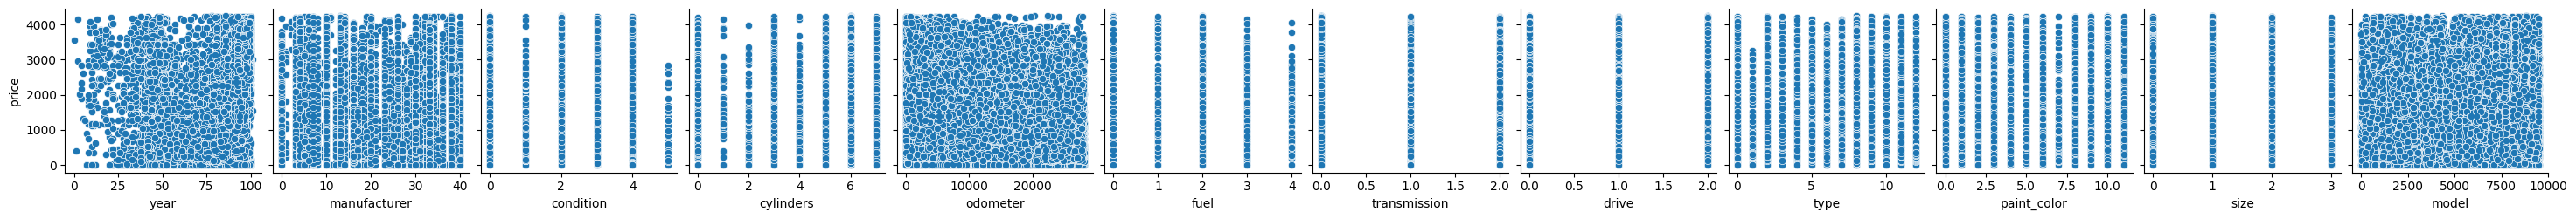

In [128]:
sns.pairplot(data, y_vars=["price"], x_vars=['year', 'manufacturer', 'condition', 'cylinders', 'odometer',
       'fuel', 'transmission', 'drive', 'type', 'paint_color', 'size',
       'model'], kind="scatter")

In [129]:
df = pd.DataFrame(data)
corr = df.corr
print(corr)

<bound method DataFrame.corr of         price  year  manufacturer  condition  cylinders  odometer  fuel  \
31       1901    92            13          0          5     17050     2   
55       2427    83            13          2          6      9872     0   
59       1769    91            16          0          5     11150     2   
65       2635    80            13          2          6     19689     0   
73       1901    96            10          0          6     10208     2   
...       ...   ...           ...        ...        ...       ...   ...   
426808   2254    84             7          0          6     17398     2   
426809   2254    69            20          2          6     14709     2   
426831   1218    64            30          3          5     14814     2   
426833    787    76            19          2          6      7092     2   
426836      0    97            33          0          5      1638     0   

        transmission  drive  type  paint_color  size  model  
31   

In [130]:
print(data.columns)
vastused = []
for column in data.columns:
    if column != 'price':
    
        vaadeldav = data[['price', column]]
        correlation = vaadeldav.corr(method='pearson')
        true_correlation = correlation['price'][column]
        print(column)
        vastused.append(abs(true_correlation))
        print(true_correlation)

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'odometer',
       'fuel', 'transmission', 'drive', 'type', 'paint_color', 'size',
       'model'],
      dtype='object')
year
0.23370775103931068
manufacturer
-0.055328026420388
condition
0.003629975067200004
cylinders
0.24356642114268515
odometer
-0.4210616902888775
fuel
-0.28700144769415825
transmission
-0.058221270299938704
drive
-0.13198606458995313
type
0.058397712362947114
paint_color
0.050399007528757596
size
-0.04278492524781844
model
0.06442276233274835


Text(0.5, 0, 'Correlation with price')

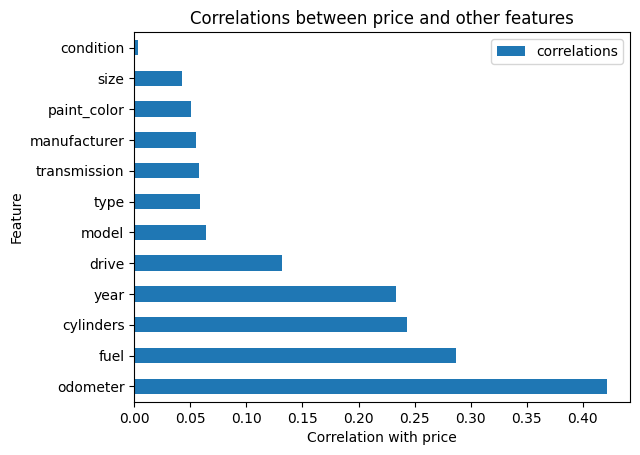

In [131]:
correlations = {'feature': ['year', 'manufacturer', 'condition', 'cylinders', 'odometer',
       'fuel', 'transmission', 'drive', 'type', 'paint_color', 'size',
       'model'],
        'correlations' : vastused}
df2 = pd.DataFrame(correlations).sort_values(by=['correlations'], ascending=False)
df2.plot(kind="barh", x='feature', y='correlations', title='Correlations between price and other features')
plt.ylabel("Feature")
plt.xlabel("Correlation with price")

In [132]:
new = data['odometer']
new.head()

31    17050
55     9872
59    11150
65    19689
73    10208
Name: odometer, dtype: int64